#Improving Computer Vision Accuracy using Convolutions

지금까지 Deep Neural Network (DNN) 를 이용해서 패션 mnist 를 분류했다.  

정확도가, 트레이닝셋은 89% 정도이고 테스트셋으로는  87% 정도가 나왔다. 

이제 Convolutional Neural Networks 이용해서 정확도를 향상시켜본다.




In [2]:
import tensorflow as tf

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(X_train,y_train ),( X_test, y_test ) = fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
import matplotlib.pyplot as plt


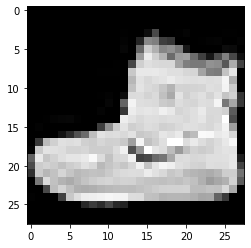

In [10]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [12]:
y_train[0]

9

In [14]:
X_train = X_train / 255.0

In [15]:
X_test = X_test / 255.0

In [16]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [21]:
from keras.layers import Conv2D, MaxPooling2D

In [23]:
def build_model() :
  model = Sequential()
  model.add( Conv2D(filters= 64, kernel_size= (3,3) , activation='relu', 
                    input_shape = (28,28,1)  )  )
  model.add( MaxPooling2D(pool_size= (2,2) , strides= 2 ) )
  model.add( Conv2D(32, (2,2) , activation='relu' )  )
  model.add( MaxPooling2D( (2,2) ,  2 ) )

  model.add( Flatten()  )
  model.add( Dense(units = 128, activation = 'relu')  )
  model.add( Dense(units = 10, activation = 'softmax'))
  model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [24]:
model = build_model()

In [29]:
3*3*64

576

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [26]:
epoch_history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 4ms/step - loss: 0.4589 - accuracy: 0.8350 - val_loss: 0.3426 - val_accuracy: 0.8762
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3079 - accuracy: 0.8882 - val_loss: 0.2955 - val_accuracy: 0.8890
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2607 - accuracy: 0.9046 - val_loss: 0.2663 - val_accuracy: 0.9051
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2302 - accuracy: 0.9139 - val_loss: 0.2495 - val_accuracy: 0.9098
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2067 - accuracy: 0.9236 - val_loss: 0.2409 - val_accuracy: 0.9114


In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2566 - accuracy: 0.9041


[0.25663402676582336, 0.9041000008583069]

트레이닝셋은 93% , 테스트셋은 91% 까지 나온다.


에포크를 20까지 해보면, 트레이닝셋 정확도는 올라가지만 밸리데이션 정확도는 내려간다. 즉, 오버핏팅이 된다.







```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


다음처럼 모델링 해서 돌려보자


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


convolution 레이어 셋팅



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


DNN 구조를 붙이기 위해, 플래튼 한다.

```
  tf.keras.layers.Flatten(),
```


128 dense layers 와 10 output layers 를 셋팅한다.



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


컴파일하여 학습하고, 평가해 보자



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```
